## GPT
- GPT란 Generative Pre-Training Transformer의 약자로 말 그대로 생성하는 사전 학습된 트랜스포머이다. 한 단어(token)가 들어오면 다음에 올 적절한 token을 생성하는 언어모델이다.

## Abstract
본 논문에서는 다양한 라벨링되지 않은 데이터로 pre-traininig을 시킨 후, 특정 task에 맞게 fine-tuning 과정을 거치는 단계를 가진다. 이전의 방법론들과 달리 모델 구조를 최소한으로 변화시키고, 효과적인 Transfer를 얻기 위한 fine-tuning 단계에서 과제에 맞는 Input representations을 사용했다.   
  
## Introduction  
Corpus는 많은데, 라벨링된 데이터는 부족하다. 따라서 모델에 적절히 적용하기가 어렵다.  
이 때문에 본 논문에서는 Unlabeled 된 다양한 Corpus에 대해 GPT를 수행함으로써 다양한 특징을 학습한 후, 이 결과를 특정 task에 맞게 추가적으로 Fine-tuning과정을 거쳐 성능을 향상시킬 수 있는 방법론을 제시한다. 약간의 fine-tuning으로 다양한 과제에 전이를 통해 사용이 가능한 범용적인 representation을 학습하는 것이다.  
  
**학습**  
- Unlabeled Dataset를 사용하여 모델 초기 parameter를 학습한다.
- 학습된 parameter를 통해  목표 task에 맞게 추가로 학습한다.   
   
장거리 의존성을 다루는 데에 뛰어나며, 보다 구조화된 memory를 쓸 수 있는 **Transformer**의 Decoder 부분을 사용한다.  

## Framework
**학습 단계**  
1. 라벨링되지 않은 Dataset를 이용하여 큰 언어모델을 학습한다.   
2. 라벨링된 데이터를 이용하여 특정 task에 맞춰 모델을 fine-tuning 한다.  
   
### 1. Unsupervised Pre-Training   
라벨링되지 않은 Corpus의 tokens $U={u_1,u_2,..,u_n}$가 주어지면 standard LM(language modeling)을 사용해 다음과 같은 likelihood를 최대화하는 방향으로 학습을 진행한다.  
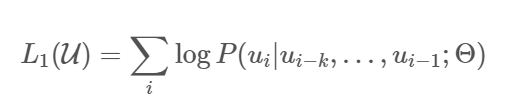
<center><font color=grey>[출처]https://simonezz.tistory.com/73</font></center>
k(context window size) 만큼의 unsupervised corpus tokens을 이용하여 현재 token $u_i$를 예측하는것이다.   
  
- GPT는 Transformer의 변형인 multi-layer Transformer의 Decoder를 사용한다. multi-layer Transformer의 Decoder는 입력 문맥 token에 multi head self-attention을 적용 후, 목표 token에 대한 분포를 얻기 위해 position-wise feed forward를 적용한다.  

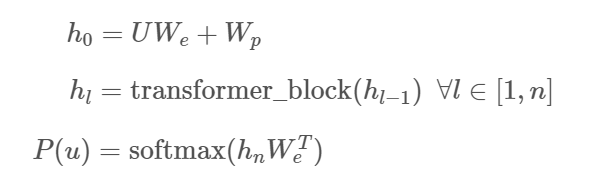
<center><font color=grey>[출처]https://simonezz.tistory.com/73</font></center>   
       
>- $U$ : imput 토큰의 context vector   
>- $W_e$ : Token Embedding Matrix   
>- $W_p$ : Position Embedding Matrix
>- $n$ : layer의 개수
>- transformer : Decoder 부분만 사용(Decoder만 12개로 구성)   
   
$h_0$ : 해당 token을 postion embedding으로 값을 정해준다.  
$h_l$ : transformer_block에 넣어서 학습을 진행한다.   
$P(u)$ : 학습된 마지막 값을 행렬곱하여 text dictionary만큼 softmax로 다음 단어를 뽑아낸다.  

    
### 2. Supervised Fine-Tuning   
pre-training을 거치고 target task에 맞게 fine-tuning을 수행한다. 라벨링된 dataset의 입력 $x^1, x^2, \dots, x^m$으로 구성되고, label y로 구성된다고 가정했을 때, 입력들은 pre-trained된 모델의 입력으로 제공되고 마지막 transformer block의 출력인 $h_l^m$으로 출력된다. 이 출력은 $W_y$를 파라미터로 하는 linear output layer의 입력으로 제공되어 y(=label)을 예측하게 된다.   
  
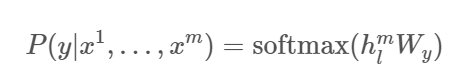
<center><font color=grey>[출처]https://simonezz.tistory.com/73</font></center>    
   
이는 다음 Objective fuction을 최대화하는 방향으로 학습을 진행한다.   
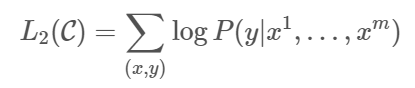
<center><font color=grey>[출처]https://simonezz.tistory.com/73</font></center>    
fine-tuning 단계에 objective function을 포함시킴으로써 supervised 모델의 일반화(범용성)을 향상시키고 빠르게 수렴할 수 있도록 한다.    
     
### 3. Task-spcific input transformation
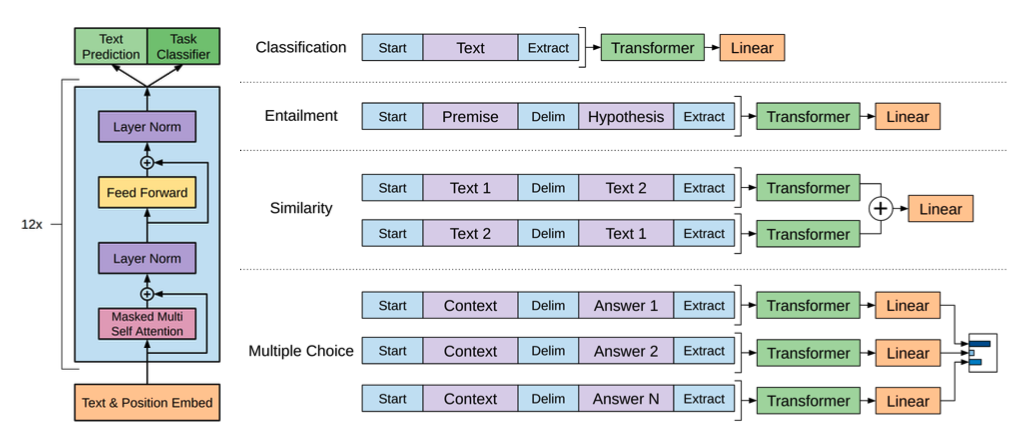
<center><font color=grey>[출처]https://jeongukjae.github.io/posts/gpt-review/</font></center>    
task마다 구조화된 입력을 해야하는 경우가 있다.   
text classification의 경우에는 바로 fine-tuning 할 수 있지만 task마다 다른 입력을 해야하는 경우도 있다.  
Task 입력 구조 $\neq$ Pre-trained 입력구조 $\rightarrow$ Task-Specific한 Customization을 해야한다.   
   
#### - Textual entailment : premise(전제)와 hypothesis(가정)를 구분자로 연결하였다. 
    - 전제와 가정이 있을 때, 그 전제와 가정이 어떤 관계인지(같은지, 반대인지, 상관이 없는지 등)   
#### - Similarity : 두 개의 텍스트 사이에 순서가 없으므로 텍스트 두 대를 다른 순서로 이어붙여 총 2개를 입력으로 사용하며, 이는 각각 Transformer의 입력으로 사용된다.    
    - 두 문장의 유사도   
#### Quenstion Answering and Commonsense Reasoning : 문맥 문서 z, 질문 q, 가능한 답변 ak 라고 한다면, [z;q;ak]로 연결되고 이는 독립적이기 때문에 모델의 입력으로 들어가며, softmax에서 결과를 예측한다.    
    - 문맥을 보고 이해를 한 후 질문을 던졌을 때, 답을 결정하는 것으로 Context(문맥+질문)과 그에 해당하는 답변 여러개를 각각 넣은 뒤 가장 적절한 답을 결정하는 것   
    
#### $\rightarrow$ transformer의 구조는 바뀌지 않고, input의 구조만 바꿔줌으로써 다양한 task를 수행할 수 있다.

## GPT Model  (https://ainote.tistory.com/17 참고)
GPT는 말그대로 언어 생성 모델이다.

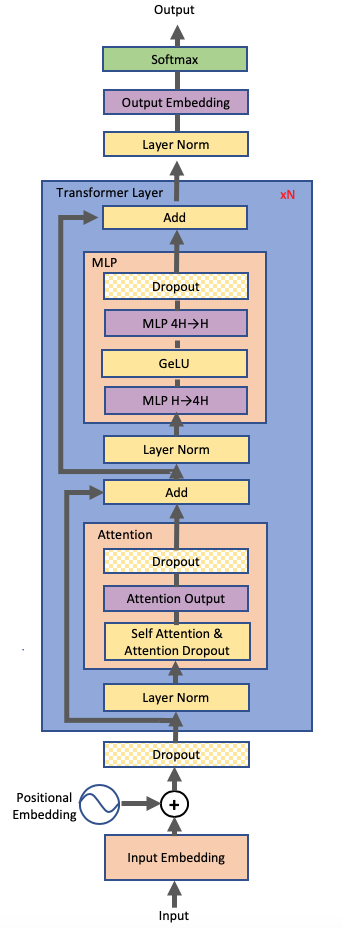
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>

#### 1. text를 **Tokenize화** 시켜준다.   
   
#### - Input  
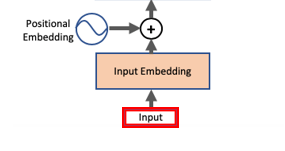
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>
GPT의 Pre-Training은 Unsupervised Learning이기 때문에 input과 label이 유사하다. GPT에는 window size라는 변수가 있는데 이는 한 Input의 토큰 개수를 의미한다.  

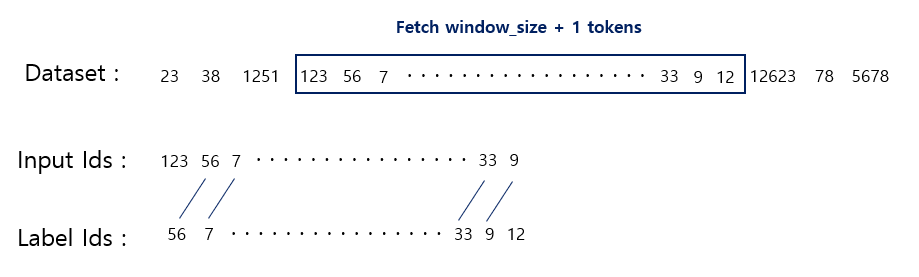
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>

In [40]:
import h5py
import random
from torch.utils.data import Dataset
 
 
class GPTDataset(Dataset):
    def __init__(self, dataset_path: str, seq_len: int, window_size: int, rng: random.Random):
        self.dataset = h5py.File(dataset_path, 'r')['token_ids']
        self.seq_len = seq_len
        self.window_size = window_size
        self.rng = rng
        self.size = len(self.dataset)
 
    def __len__(self):
        return self.size
 
    def __getitem__(self, idx):
        start_point = self.rng.randint(0, self.size) # 0부터 self.size까지 중 랜덤
        end_point = min(start_point + (window_size + 1), self.size) # 최소 start_point에서 window_size+1만큼 더한거부터 self.size까지
        window = self.dataset[start_point: end_point]  # Windowing
 
        input_ids = window[:-1]
        label_ids = window[1:]
        return input_ids, label_ids

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcUm396%2FbtqWUNj1gW0%2FwAApRYkdvEqbz5cole23IK%2Fimg.png'>

In [5]:
import torch

def create_future_mask(x: torch.Tensor, offset: int = 0) -> torch.Tensor:
 
    seq_len = x.size(-1)  # seq_length
 
    # Create shifted upper triangular matrix.
    future = torch.ones((seq_len, seq_len), dtype=torch.bool, device=x.device)
    future = future.triu(1)
 
    future_mask = future.view((1,) * (x.ndim - 1) + future.size())
    return future_mask.expand(x.shape + future_mask.shape[-1:])  # (b, s, s)

__getitem__ 함수
- start_point : 0 ~ 데이터셋 길이 사이의 임의의 시작점을 고른다.  
- end_point : 한 Sample의 끝점을 고른다.  
- window : Window size + 1개의 연속된 토큰을 슬라이싱한다.   
- input_ids : 첫 번째 토큰부터 window_size개 = Input Ids
- label_ids : 두 번째 토큰부터 window_size개 = Label Ids  
   
모델에 실제로 Input으로 들어가게 되는 Input Ids와 Label Ids는 (batch_size, seq_length)의 shape을 가진다. 모델에는 Input Ids가 들어가고 출력된 Logits과 Label Ids와 비교하게 된다.  
<font color=grey>※ seq_length는 window_size와 동일하다.</font>    
   
#### - Embedding, Dropout
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbgDUif%2FbtqWXaSSaEF%2FtK8uKipeSJc3AgjHXylKz1%2Fimg.png'>
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>    
 
- Token Embedding(token들의 차원을 축소하는 과정) : Token Id의 차원은 vocab 개수이다. Vocab이 N개이면 Token Id는 0 ~ N-1의 정수가 될 수 있다. 즉, 0 ~ N-1의 정수를 hidden_size의 벡터로 바꾸는 과정이다. hidden_size는 Embedding 차원이며, GPT-3의 경우 1600이다. Token Embedding을 거치면 Input Ids(Token Id의 배열)이 (batch_size, seq_length, hidden_size)의 shape을 가지게 된다.      
  
- Position Embedding : GPT의 input에는 해당 token의 위치가 어디인지에 대한 정보가 없기 때문에 position embedding으로 위치정보를 추가해준다. (position embedding 후에도 (batch_size, seq_length, hidden_size)의 shape의 벡터를 얻는다.)     
  
- Dropout : Dropout 과정을 거쳐 Masked Attention Layer에 들어갈 Input을 만든다.   
   

In [ ]:
import torch.nn as nn
 
token_embeddings = nn.Embedding(vocab_size, hidden_size)
position_embeddings = nn.Embedding(seq_len, hidden_size)
 
def position_embed(input_ids, position_embeddings):
 
    seq_length = input_ids.size(1)
    position_ids = torch.arange(seq_length, dtype=torch.long, device=input_ids.device)
    position_ids = position_ids.unsqueeze(0).expand_as(input_ids)
 
   position_embedding_vector = position_embeddings(position_ids)
 
    return position_embedding_vector

drop = nn.Dropout(0.1)
final_embed_vector = drop(token_embed_vector + position_embed_vector)

#### Layer Norm  
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fnjf4F%2FbtqW1sZY60v%2FH34y7Pm0EOQvhU6Fe6kQp1%2Fimg.png'>
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>   
GPT에서 Layer Normalization은 벡터들의 값을 정규화하여 training 시간을 줄이는 것이 목표이다.   
   

In [ ]:
layer_norm = nn.LayerNorm(hidden_size, eps=1e-5)
ln_vector = layer_norm(final_embed_vector)

#### Masked Multi-Head Self Attention  
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fr4YIv%2FbtqW4iJAjpJ%2FClf87Uckpo5fUTCFuRyqB1%2Fimg.png'>
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>    
  
- Masked : 현재 시점 이후의 token을 가림으로서 학습에 참여시키지 않는 것    
  
- Multi : Attention가 2개 이상

In [ ]:
import math
import torch
import torch.nn as nn
from typing import Optional, Tuple
 
 
class AttentionLayer(nn.Module):
 
    def __init__(self, heads: int, dims: int, dropout: float = 0.1):
        super().__init__()
        self.attn = MultiHeadAttention(heads, dropout)
        self.proj_q = nn.Linear(dims, dims)  # (h, h)
        self.proj_k = nn.Linear(dims, dims)  # (h, h)
        self.proj_v = nn.Linear(dims, dims)  # (h, h)
        self.linear = nn.Linear(dims, dims)  # (h, h)
 
    def forward(self,
                q: torch.Tensor,
                k: torch.Tensor,
                v: torch.Tensor,
                past: Optional[Tuple[torch.Tensor, torch.Tensor]] = None,
                mask: Optional[torch.Tensor] = None
                ) -> Tuple[torch.Tensor, Tuple[torch.Tensor, torch.Tensor]]:
        
        # Get Query, Key, Value / Shape : (batch_size, seq_length, hidden_size)
        q, k, v = self.proj_q(q), self.proj_k(k), self.proj_v(v)
 
        s = self.attn(q, k, v, mask)
        x = self.linear(s)  # (h, h)
 
        return x, (k, v)

forward 함수
- q, k, v : 들어온 Input Tensor로 Query, Key, Value를 만드는 것이다.  
실제로 GPT가 Pre-training될 때 학습되는 것은 Q, K, V를 만드는 Layer이다.  
들어온 Input Tensor가 (batch_size, seq_length, hidden_size)의 shape을 가지기 때문에 Query, Key, Value 모두 같은 shape을 가진다. (각 token이 모두 Query, Key, Value를 갖는다.)  
- s : Multi-Head Attention을 거치는 것이다. Multi-Head Attention이란 한 개의 Query, Key, Value를 여러개로 쪼개는 것이다.    
 
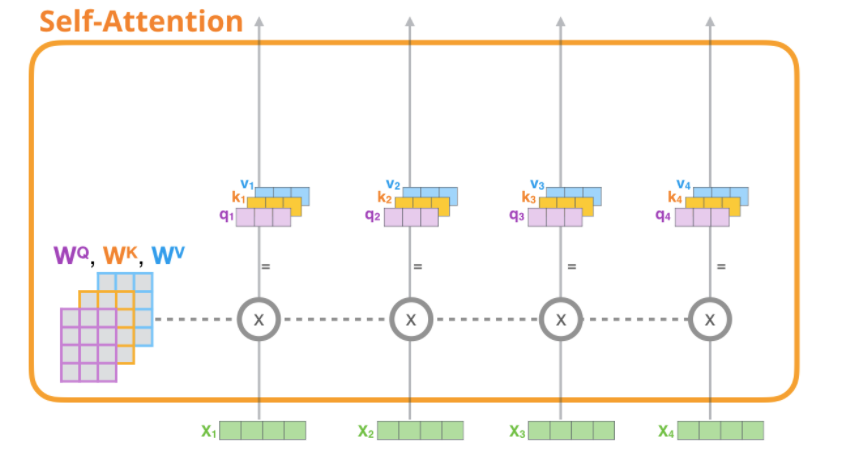
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>  

In [ ]:
import math
import torch
import torch.nn as nn
from typing import Optional, Tuple
 
 
class MultiHeadAttention(object):
 
    def __init__(self, heads: int, dropout: float = 0.1):
        super().__init__(dropout)
        self.heads = heads
        self.dropout = nn.Dropout(dropout)
 
    def forward(self,
                q: torch.Tensor,
                k: torch.Tensor,
                v: torch.Tensor,
                mask: Optional[torch.Tensor] = None) -> torch.Tensor:
 
        # Split the tensors to multi-heads.
        # Shape : (batch_size, seq_length, head_num, one_head_len)
        q = q.view(q.size()[:-1] + (self.heads, q.size(-1) // self.heads))
        k = k.view(k.size()[:-1] + (self.heads, k.size(-1) // self.heads))
        v = v.view(v.size()[:-1] + (self.heads, v.size(-1) // self.heads))

        # Shape : (batch_size, head_num, seq_length, one_head_len)
        q = q.transpose(-3, -2)
        k = k.transpose(-3, -2)
        v = v.transpose(-3, -2)
 
        if mask is not None:
            mask = mask.unsqueeze(-3)  # (batch_size, 1, seq_length, seq_length)
            mask = mask.type_as(x)  # (batch_size, head_num, seq_length, seq_length)
 
 
        # Calculate multi-headed attentions and merge them into one.
        k = k.transpose(-2, -1)  # (batch_size, head_num, one_head_len, seq_length)
        num_heads_sqrt = math.sqrt(k.size(-1))  # sqrt(head_num)
        
        # Matrix Multiple Query AND Keys / Divide with sqrt(head_num)
        # Shape : (batch_size, head_num, seq_length, seq_length)
        # -> 각 샘플의 (batch_size) 각 head의 (head_num), 각 token의 (seq_length), 해당 샘플의 다른 모든 토큰들에 대한 Attention값이 된다.
        # 제곱근으로 나누어주는 이유는 빠른 수렴을 위해 가하는 작업이다.
        score = torch.matmul(q, k) / num_heads_sqrt
        
        # Add Large Negative where the mask is true
        # Shape : (batch_size, head_num, seq_length, seq_length)
        # mask를 head의 수만큼 늘려준 뒤, True (1)인 부분에 아주 큰 음수를 곱한다.
        masked_score = score + mask * score.new_tensor(-1e6)
        
        # Softmax
        # float that large negative number has added becomes to zero
        # 큰 음수 값을 곱한 후 softmax를 취했으므로  True였던 부분은 0이 된다.
            ### 밑 그림 참고
        masked_score  = masked_score.softmax(-1)
        # 자기 이후 token들의 attention을 0으로 바꾼 후 dropout 적용
        masked_score  = self.dropout(masked_score)
        
        # Matrix Multiple score and value
        # Shape : (batch_size, head_num, seq_length, one_head_len)
        # 다른 token들과의 Attention score와 value(Embedding vector의 일부)를 곱하여 Attention score를 만든다.
        attention_score = torch.matmul(x, v)
        
        # (batch_size, seq_length, head_num, one_head_len)
        attention_score = attention_score.transpose(-3, -2).contiguous()
 
        # (batch_size, seq_length, hidden_size)
        original_shape = q.size()[:-3] + (q.size(-2), v.size(-1) * self.heads)
        attention_score = attention_score.view(original_shape)
 
        return attention_score

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcstvVa%2FbtqW1sTaulu%2FL12GGUr2cxnhEduksJYSC1%2Fimg.png'>
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FGNo1i%2FbtqWVQ8EeZD%2FehXu1twLd9lM4myEoru2Y0%2Fimg.png'>
위는 큰 음수를 곱한 후 sofrmax를 취하여 자기 이후의 token들에 대한 attention값을 삭제하는 효과를 나타낸 그림이다.

forward 함수   
Query, Key, Value를 여러개로 분할하는 것을 볼 수 있다. hidden_size 차원의 벡터였던 각 토큰의 Query, Key, Value를 각각 head_num개로 쪼개었다. 한 쌍의 Query, Key, Value를 Head라고 하기 때문에 GPT의 Attention은 한 토큰에 Query, Key, Value 쌍이 여러개인 Multi-Head Attention이라고 하는 것이다.  
   
이후 Query와 Key를 행렬 곱하여 score를 만들어주고, 현재 시점 이후의 token들을 지워 masking 과정을 진행하여 Masked score를 만든다.  
Masked score에 Value 값을 행렬 곱하여 Attention score를 만들어준다. 
  
#### Add(Skip connection) & Layer Normalization  
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F5nGvy%2FbtqWVQ8E3GJ%2Fs0MK6tyTkCkubgQ5v8rJqK%2Fimg.png'>
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>  
Transformer Layer에 처음 들어온 Vector를 Masked Multi-Head Self Attention을 거친 Vector와 더하는 것을 Skip Connection이라고 한다. 이전 층에 대한 정보 손실을 막기 위해 사용된다.
  
#### Feed Forward Neural Network  
<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fk2Qi7%2FbtqW1sFE9Ff%2FtDHez52IjnQR5gyn5AR5z0%2Fimg.png'>
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>  
Nomalize된 Vector의 차원을 키웠다 줄이는 과정으로 이는 Embedding Vector 차원(hidden_size)의 병목(전체 시스템이나 성능이 하나의 구성요소로 인해 제한을 받는 현상)을 줄여주는 효과가 있다고 한다. GPT에서는 hidden_size를 4배 키웠다 줄이며 이는 Transformer에서 그랬기 때문에 그대로 가져다 쓴 것이다.  
   

In [ ]:
class PositionWiseFeedForward(nn.Sequential):
 
    def __init__(self, dims: int, rate: int = 4, dropout: float = 0.1):
        super().__init__(
            nn.Linear(dims, dims * rate),  # (b, s, 4 * h)
            gelu(),  # Activation Function
            nn.Dropout(dropout),
            nn.Linear(dims * rate, dims))  # (b, s, h)

#### Add(Skip connection)  
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdDGtKE%2FbtqWXaZQwXW%2FGooJQUy24do7LspMLyPVzk%2Fimg.png'>
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>  
Masked Multi-Head Attention을 거쳐서 나온 벡터와 Feed Forward Neural Network를 거쳐서 나온 벡터를 더해준다. Normalization은 다음 Transformer Layer의 첫부분에서 하게 된다. (GPT-1은 12번, GPT-3는 48번)    
   
#### Predicting Next Token   
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcl5NpE%2FbtqWWtk2MfL%2FIXJwpclrFUXRFrPFn7XNCk%2Fimg.png'>
<center><font color=grey>[출처]https://ainote.tistory.com/17</font></center>   
  
- Layer Norm : 마지막 Transformer Layer에서는 Normalization을 거치지 않았기 때문에 Normalization을 해준다.   
- Output Embedding : Token Embedding은 0 ~ vocab_size -1의 정수를 hidden_size의 벡터로 바꾸는 과정이었다면 Output Embedding은 반대로 hidden_size 벡터를 vocab_size로 바꾸는 과정이다. 이때, Token Embedding의 weight를 사용한다. 즉, Token Embedding과 Output Embedding은 동일한 weight를 사용하는 Linear Layer이다.   
- Softmax : Output Embedding을 거쳐서 나온 logit에 Softmax를 취해 다음에 각 토큰이 올 확률을 구한다. 이후 해당 값과 Label Id의 CrossEntropy를 사용하여 loss를 구한다.

#### 참고 블로그
- https://jeongukjae.github.io/posts/gpt-review/
- https://dsbook.tistory.com/321
- https://simonezz.tistory.com/73
- https://enlqn1010.tistory.com/140
- https://hipgyung.tistory.com/entry/Improving-Language-Understanding-by-Generative-Pre-Training-%EB%85%BC%EB%AC%B8-%EB%A6%AC%EB%B7%B0
- https://ainote.tistory.com/17